# Analisis e Insights

Llegamos a la parte más importante, donde vamos a intentar obtener conclusiones relevantes para el objetivo utilizando todo el trabajo de preparación que hemos hecho, las técnicas de Business Analytics y crearemos una visualización en mapa.

Para ello empezaremos dando respuesta a las preguntas semilla y es probable que en el proceso nos vayan surgiendo hallazgos interesantes que nos lleven a nuevas preguntas o a la aplicación de ciertas técnicas.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

%config IPCompleter.greedy=True
pd.options.display.max_columns = None 

## Carga de datos

In [6]:
con = sa.create_engine("sqlite:///Datos2023/airbnb.db")
df_analisis = pd.read_sql("df_analisis", con)
df_analisis

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,bedrooms,bathrooms,host_is_superhost,accommodates,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,ocupacion_disc,metros_2,precio_compra,distancia_a_sol
0,0,0,6369,Rental unit in Madrid · ★4.88 · 1 bedroom · 1 ...,13660,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,85.0,5,1,22,1.0,1.0,t,2,1.0,106,4.88,4.86,4.84,6039,85.0,94.0,01_Una,0-3,1,30-297,02_91%-100%,60,362340,5.032039
1,1,1,30320,Rental unit in Madrid · ★4.63 · 1 bedroom · 2 ...,130907,Centro,Sol,40.414760,-3.704180,Entire home/apt,65.0,5,3,0,1.0,1.0,f,2,2.0,172,4.63,4.78,4.90,6144,65.0,100.0,01_Una,0-3,1,30-297,02_91%-100%,60,368640,0.230175
2,2,2,21853,Rental unit in Madrid · ★4.58 · 1 bedroom · 1 ...,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31.0,4,2,135,1.0,1.0,f,1,1.0,33,4.58,4.82,4.21,2699,31.0,63.0,01_Una,0-3,1,6-29,01_53%-90%,60,161940,3.521406
3,3,3,24805,Rental unit in Madrid · ★4.91 · 6 bedrooms · 1...,346366726,Centro,Universidad,40.421830,-3.705290,Entire home/apt,94.0,5,1,168,6.0,1.0,f,3,1.0,33,4.91,4.97,5.00,6144,94.0,54.0,04_Cuatro_o_mas,0-3,1,6-29,01_53%-90%,150,921600,0.591065
4,4,4,26825,Home in Madrid · ★4.72 · 1 bedroom · 1 bed · 1...,114340,Arganzuela,Legazpi,40.389750,-3.690180,Private room,29.0,3,1,295,1.0,1.5,t,1,1.0,196,4.72,4.72,4.73,4595,29.0,19.2,01_Una,0-3,1,30-297,00_0%-52%,60,275700,3.200942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21314,21382,21382,1046219783290634155,Rental unit in Madrid · ★New · 2 bedrooms · 3 ...,529402573,Usera,Zofío,40.384658,-3.714106,Entire home/apt,120.0,1,56,303,2.0,1.0,f,4,3.0,0,NaN,NaN,NaN,2368,120.0,17.0,02_Dos,4,2,0-5,00_0%-52%,70,165760,3.681721
21315,21383,21383,1045519419976898566,Rental unit in Madrid · ★New · 1 bedroom · 1 b...,529402573,Salamanca,Guindalera,40.438832,-3.671323,Entire home/apt,120.0,1,56,189,1.0,1.0,f,2,1.0,0,NaN,NaN,NaN,7374,120.0,48.2,01_Una,0-3,1,0-5,00_0%-52%,60,442440,3.659591
21316,21384,21384,1046222300986271054,Rental unit in Madrid · ★New · 1 bedroom · 1 b...,31772865,Tetuán,Castillejos,40.458234,-3.695566,Entire home/apt,171.0,1,42,318,1.0,1.0,f,2,1.0,0,NaN,NaN,NaN,4344,171.0,12.9,01_Una,0-3,1,0-5,00_0%-52%,60,260640,4.663274
21317,21385,21385,1046239141714406672,Rental unit in Madrid · ★New · 2 bedrooms · 4 ...,346367515,Chamberí,Arapiles,40.433040,-3.711060,Entire home/apt,74.0,31,237,326,2.0,1.0,f,4,4.0,0,NaN,NaN,NaN,6347,74.0,10.7,02_Dos,4,3,0-5,00_0%-52%,70,444290,1.928543


## Analisis 

### Análisis del precio

**¿Cual es el precio medio? ¿y el rango de precios?¿Y por distritos?¿Y por barrios?**

**¿Cual es el ranking de distritos y barrios por precio medio de alquiler?**

In [7]:
df_analisis.precio_total.describe()

count    21319.000000
mean       131.470777
std        282.524045
min         20.000000
25%         60.000000
50%         91.000000
75%        138.000000
max      21000.000000
Name: precio_total, dtype: float64

- Vemos que hay al menos un atípico por la parte de arriba que sesga la media, ya que la desviación típica es más del doble de la media, por tanto vamos a usar la mediana como medida de centralización más fiable.

In [8]:
df_analisis.precio_total.median()

91.0

In [11]:
df_analisis.groupby("neighbourhood_group")["precio_total"].median().sort_values(ascending=False)

neighbourhood_group
Salamanca                120.5
Centro                   103.0
Chamberí                 100.0
Moncloa - Aravaca         93.0
Chamartín                 93.0
Retiro                    91.0
Tetuán                    83.0
San Blas - Canillejas     82.0
Arganzuela                81.5
Hortaleza                 75.0
Fuencarral - El Pardo     69.0
Ciudad Lineal             65.0
Barajas                   60.5
Carabanchel               60.2
Usera                     58.0
Puente de Vallecas        57.0
Latina                    55.0
Villa de Vallecas         54.0
Villaverde                51.0
Vicálvaro                 49.0
Moratalaz                 38.5
Name: precio_total, dtype: float64

Nos llama la atención el dato de San Blas, vamos a verlo con más detalle a ver qué está pasando.

In [12]:
df_analisis.loc[df_analisis.neighbourhood_group=="San Blas - Canillejas"].sort_values(by="precio_total", ascending=False)

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,bedrooms,bathrooms,host_is_superhost,accommodates,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,ocupacion_disc,metros_2,precio_compra,distancia_a_sol
5248,5273,5273,35149419,Chalet in Madrid · 4 bedrooms · 5 beds · 2 baths,143732655,San Blas - Canillejas,Canillejas,40.449370,-3.616330,Entire home/apt,6000.0,1,1,0,4.0,2.0,f,6,5.0,0,NaN,NaN,NaN,2863,6000.0,100.0,04_Cuatro_o_mas,5-16,4-39,0-5,02_91%-100%,120,343560,8.212429
5151,5173,5173,34933116,Chalet in Madrid · 3 bedrooms · 3 beds · 1.5 s...,263232278,San Blas - Canillejas,Simancas,40.439680,-3.619330,Private room,2000.0,2,1,0,3.0,1.5,f,5,3.0,0,NaN,NaN,NaN,2863,4200.0,100.0,03_Tres,5-16,2,0-5,02_91%-100%,90,257670,7.557076
4990,5009,5009,34826962,Rental unit in Madrid · 2 bedrooms · 3 beds · ...,222068421,San Blas - Canillejas,Arcos,40.419270,-3.615550,Private room,3000.0,1,1,0,2.0,1.5,f,4,3.0,0,NaN,NaN,NaN,2863,4200.0,100.0,02_Dos,4,2,0-5,02_91%-100%,70,200410,7.439364
4999,5018,5018,34836238,Home in Madrid · 2 bedrooms · 1 bed · 1 bath,262622230,San Blas - Canillejas,Simancas,40.438790,-3.614250,Entire home/apt,3000.0,1,1,0,2.0,1.0,f,4,1.0,0,NaN,NaN,NaN,2863,3000.0,100.0,02_Dos,4,1,0-5,02_91%-100%,70,200410,7.932095
5045,5066,5066,34970236,Home in Madrid · 5 bedrooms · 8 beds · 4 baths,263474389,San Blas - Canillejas,Arcos,40.419200,-3.612290,Private room,800.0,1,1,0,5.0,4.0,f,10,8.0,0,NaN,NaN,NaN,2863,2800.0,100.0,04_Cuatro_o_mas,5-16,4-39,0-5,02_91%-100%,150,429450,7.714952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9976,10016,10016,590435337953412287,Rental unit in Madrid · ★4.89 · 1 bedroom · 1 ...,262405800,San Blas - Canillejas,Simancas,40.427500,-3.628340,Private room,25.0,15,1,317,1.0,1.0,t,1,1.0,9,4.89,5.00,4.78,2863,25.0,13.2,01_Una,0-3,1,0-5,00_0%-52%,60,171780,6.462576
7320,7355,7355,46981393,Home in Madrid · ★4.07 · 1 bedroom · 1 bed · 1...,379040878,San Blas - Canillejas,Amposta,40.427230,-3.620200,Private room,24.0,2,1,363,1.0,1.0,f,2,1.0,75,4.07,4.27,4.04,2863,24.0,0.5,01_Una,0-3,1,30-297,00_0%-52%,60,171780,7.136063
19422,19489,19489,996179019688210848,Rental unit in Madrid · ★New · 1 bedroom · 1 b...,538923092,San Blas - Canillejas,Simancas,40.430870,-3.624799,Private room,22.0,1,1,88,1.0,1.0,f,1,1.0,0,NaN,NaN,NaN,2863,22.0,75.9,01_Una,0-3,1,0-5,01_53%-90%,60,171780,6.833685
942,952,952,7783777,Rental unit in Madrid · ★4.84 · 1 bedroom · 1 ...,40957790,San Blas - Canillejas,Arcos,40.423810,-3.617900,Private room,22.0,1,2,68,1.0,1.0,t,1,1.0,802,4.84,4.92,4.55,2863,22.0,81.4,01_Una,0-3,1,30-297,01_53%-90%,60,171780,7.277503


In [145]:
df_analisis.loc[df_analisis.precio_total >1000]

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,bedrooms,bathrooms,host_is_superhost,accommodates,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,ocupacion_disc,metros_2,precio_compra,distancia_a_sol
665,675,675,5420660,Rental unit in Madrid · 2 bedrooms · 3 beds · ...,1206817,Centro,Palacio,40.410850,-3.710700,Private room,1000.0,1,1,364,2.0,1.0,f,3,3.0,0,NaN,NaN,NaN,6144,1400.0,0.3,02_Dos,0-3,2,0-5,00_0%-52%,70,430080,0.903346
1457,1468,1468,12867848,Rental unit in Madrid · ★4.86 · 4 bedrooms · 6...,70358747,Arganzuela,Acacias,40.401070,-3.713060,Entire home/apt,1179.0,222,1,270,4.0,2.0,f,7,6.0,85,4.86,4.99,4.91,4595,1179.0,26.0,04_Cuatro_o_mas,5-16,4-39,30-297,00_0%-52%,120,551400,1.926364
1503,1514,1514,13484101,Rental unit in Madrid · 2 bedrooms · 1 bed · 2...,12455551,Moncloa - Aravaca,Argüelles,40.430040,-3.716990,Private room,1000.0,1,1,89,2.0,2.0,f,4,1.0,0,NaN,NaN,NaN,4700,1400.0,75.6,02_Dos,4,1,0-5,01_53%-90%,70,329000,1.878429
1536,1547,1547,13750696,Rental unit in Madrid · 1 bedroom · 1 bed · 1 ...,8275478,Chamberí,Arapiles,40.430330,-3.711420,Entire home/apt,1200.0,1,1,0,1.0,1.0,f,3,1.0,0,NaN,NaN,NaN,6347,1200.0,100.0,01_Una,0-3,1,0-5,02_91%-100%,60,380820,1.660471
1662,1673,1673,14418694,Floor in Madrid · ★4.88 · 1 bedroom · 1 bed · ...,15328893,Centro,Justicia,40.420740,-3.700700,Private room,1200.0,1,3,63,1.0,1.0,t,2,1.0,234,4.88,4.96,4.99,6144,1200.0,82.7,01_Una,0-3,1,30-297,01_53%-90%,60,368640,0.499076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15564,15624,15624,879532717088321380,Rental unit in Madrid · ★New · 4 bedrooms · 4 ...,354326052,Centro,Cortes,40.415769,-3.696206,Entire home/apt,1029.0,5,3,39,4.0,4.0,t,8,4.0,0,NaN,NaN,NaN,6144,1029.0,89.3,04_Cuatro_o_mas,5-16,3,0-5,01_53%-90%,120,737280,0.613352
18078,18143,18143,949842440822212072,Rental unit in Madrid · 2 bedrooms · 2 beds · ...,28038703,Moncloa - Aravaca,Argüelles,40.423360,-3.713329,Entire home/apt,1560.0,1,101,213,2.0,2.0,f,4,2.0,1,5.00,5.00,5.00,4700,1560.0,41.6,02_Dos,4,1,0-5,00_0%-52%,70,329000,1.122426
18354,18419,18419,957756434719193756,Rental unit in Madrid · 2 bedrooms · 3 beds · ...,439074505,Centro,Palacio,40.418392,-3.712858,Entire home/apt,1200.0,1,3,364,2.0,2.0,f,6,3.0,0,NaN,NaN,NaN,6144,1200.0,0.3,02_Dos,5-16,2,0-5,00_0%-52%,70,430080,0.827086
20978,21046,21046,1036858980675216676,Rental unit in Madrid · ★New · 10 bedrooms · 1...,494040452,Centro,Palacio,40.418870,-3.708960,Entire home/apt,1873.0,1,5,270,10.0,5.0,f,16,12.0,0,NaN,NaN,NaN,6144,1873.0,26.0,04_Cuatro_o_mas,5-16,4-39,0-5,00_0%-52%,150,921600,0.532319


Vemos que son precios en el entorno de los 3.000 - 5.000 euros. 

Sabemos que el estadio del atletico de madrid, el Wanda Metropolitano, está en este barrio por lo que nos puede dejar un insight interesante. 

**Pueden existir inmuebles con un valor regular residual pero con alto valor en momentos puntuales por acontenicimientos deportivos o espectáculos**

- ¿Tendría sentido generar un producto de alquiler que consista en alquilar de forma "normal" a un precio inferior al mercado con la condición de que el inquilino deje el piso libre para alquilarlo "turísticamente" en fechas señaladas?

En el resto no hay sorpresas, con distritos como Salamanca, Centro o Chanmartín como los más caros. 

Pero por ejemplo vemos que la diferencia de precio medio entre Retiro y Tetuán es muy baja.

Esto nos lleva a comparar el precio medio por distrito con el precio medio de compra también por distrito.

**Retiro Vs Tetuan**

In [17]:
temp = (df_analisis.groupby("neighbourhood_group")[["precio_total", "precio_compra"]].median()
 .sort_values(by="precio_total", ascending=False))
temp

,precio_total,precio_compra
neighbourhood_group,,
Salamanca,120.5,442440.0
Centro,103.0,368640.0
Chamberí,100.0,380820.0
Moncloa - Aravaca,93.0,282000.0
Chamartín,93.0,362340.0
Retiro,91.0,326820.0
Tetuán,83.0,260640.0
San Blas - Canillejas,82.0,171780.0
Arganzuela,81.5,275700.0


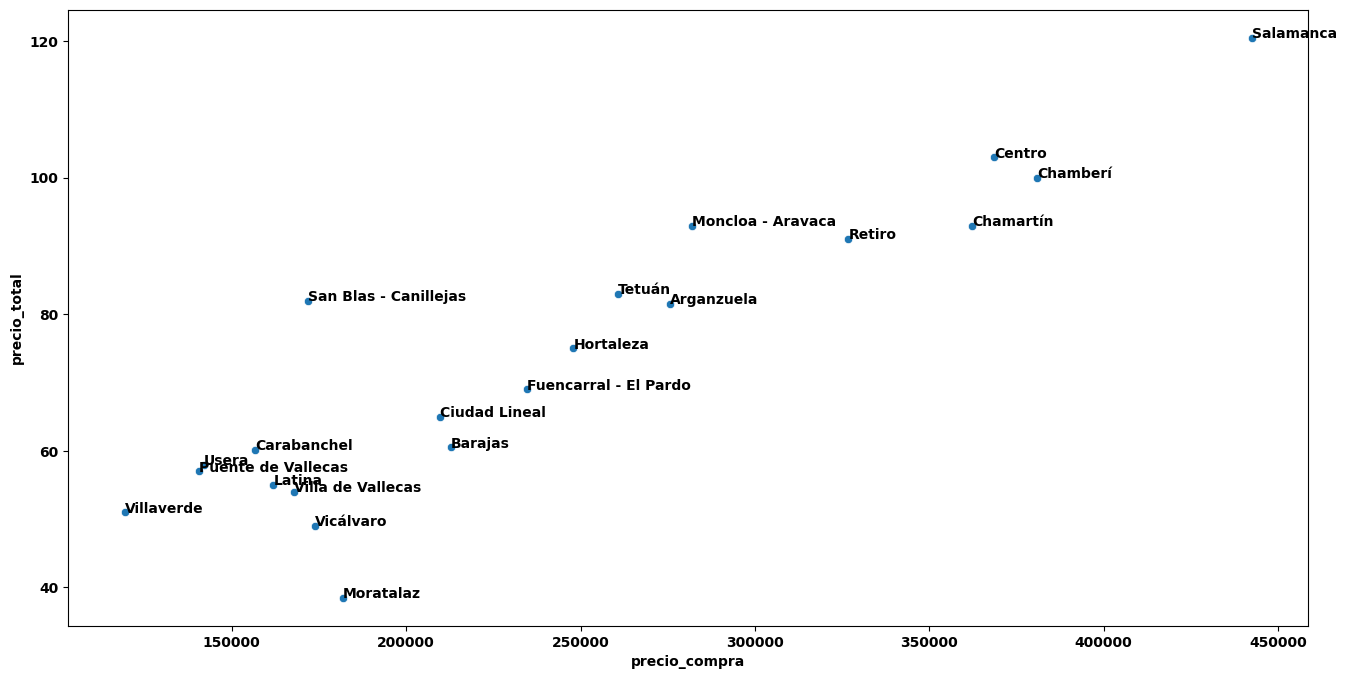

In [18]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=temp, x="precio_compra", y="precio_total")
for elem in range(0,temp.shape[0]):
    plt.text(temp.precio_compra.iloc[elem], temp.precio_total.iloc[elem], temp.index[elem])

Existe una clara correlación entre el precio de compra en cada distrito y el precio que podremos cobrar.

Claramente se perciben tres clusters de bajo-bajo, medio-medio y alto-alto.

Y la excepción de San Blas que ya hemos identificado por qué puede ser. 

Por tanto como era esperable no hay a priori ningún "chollo" claro a este nivel.

Repetimos el análisis a nivel de barrio a ver si identificamos algo.

In [20]:
temp = df_analisis.groupby("neighbourhood")[["precio_total", "precio_compra"]].median().sort_values(by="precio_total", ascending=False)
temp

,precio_total,precio_compra
neighbourhood,,
Recoletos,159.0,479310.0
Castellana,156.0,516180.0
Valdemarín,136.5,282000.0
El Viso,135.0,362340.0
Goya,135.0,442440.0
...,...,...
Los Angeles,36.5,119280.0
Fontarrón,33.0,181800.0
Media Legua,32.0,181800.0


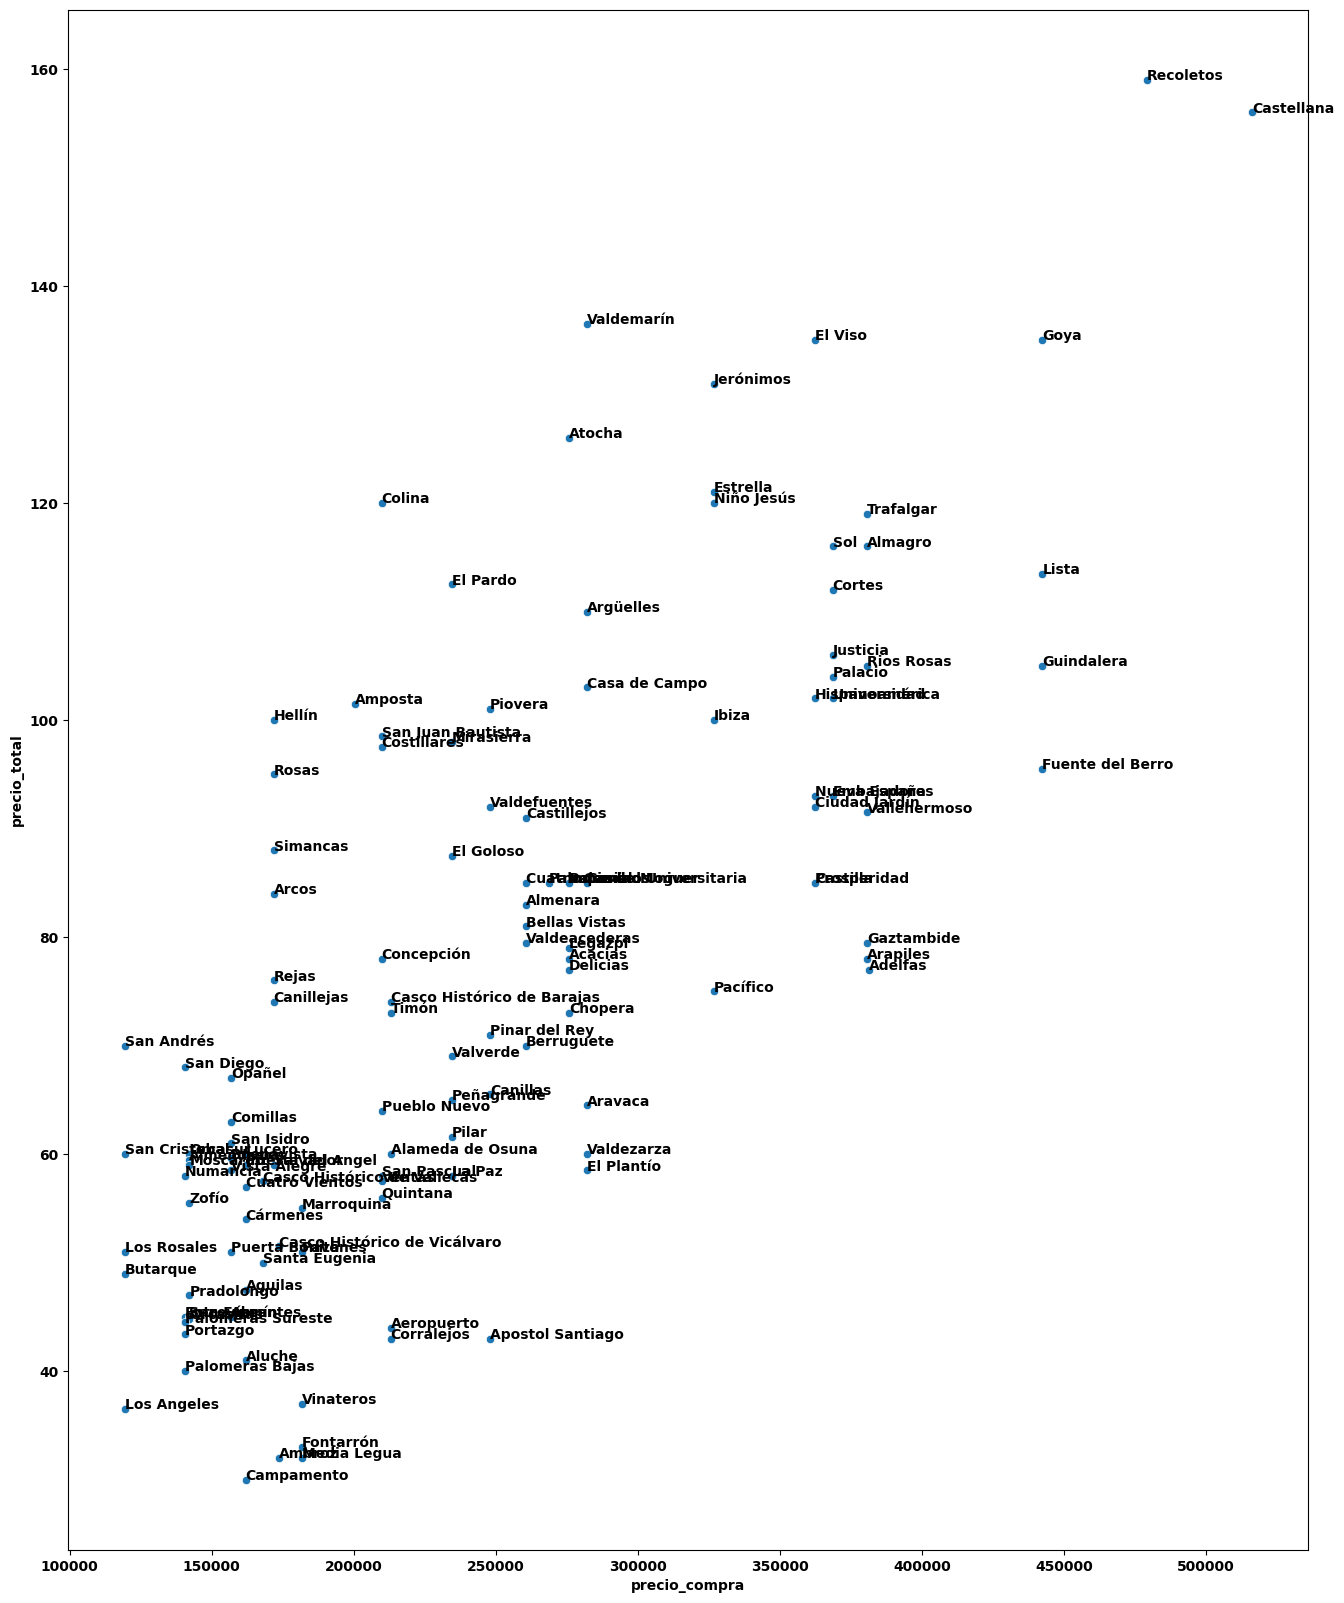

In [22]:
plt.figure(figsize=(16,20))
sns.scatterplot(data=temp, x="precio_compra", y="precio_total")
for elem in range(0,temp.shape[0]):
    plt.text(temp.precio_compra.iloc[elem], temp.precio_total.iloc[elem], temp.index[elem])

A nivel barrio se pueden ver más cosas:


* Dentro de cada grupo de bajo-medio-alto sí podemos empezar a separarar
    * Bajo: San Andrés, San Diego, Opañel
    * Medio-Bajo: Hellín, Rosas , Simancas, posiblemente los 3 sean de San Blas
    * Medio: Valdemarín, Atocha
    * Medio-alto: Jerónimos, El Viso
    * Alto: Recoletos, Castellana
    
**Insight 1: Existen ciertos barrios que apriori pueden maximizar la relación coste-ingresos y además podemos segmentarlo por el tipo calidad del inmueble en el que nos interes invertir**

In [35]:
df_analisis.columns

Index(['level_0', 'index', 'id', 'name', 'host_id', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'calculated_host_listings_count', 'availability_365',
       'bedrooms', 'bathrooms', 'host_is_superhost', 'accommodates', 'beds',
       'number_of_reviews', 'review_scores_rating',
       'review_scores_communication', 'review_scores_location', 'precio_m2',
       'precio_total', 'ocupacion', 'bedrooms_disc', 'accommodates_disc',
       'beds_disc', 'number_of_reviews_disc', 'ocupacion_disc', 'metros_2',
       'precio_compra', 'distancia_a_sol'],
      dtype='object')

In [33]:
df_analisis.neighbourhood

0        Hispanoamérica
1                   Sol
2              Cármenes
3           Universidad
4               Legazpi
              ...      
21314             Zofío
21315        Guindalera
21316       Castillejos
21317          Arapiles
21318          Justicia
Name: neighbourhood, Length: 21319, dtype: object

In [38]:
df_analisis.loc[df_analisis.neighbourhood.isin(['Hellín','Rosas','Simancas']),'neighbourhood_group'].unique()

array(['San Blas - Canillejas'], dtype=object)

**¿Qué factores (a parte de la localización determinan el precio del alquiler?**

In [39]:
df_analisis.filter(like="disc")

,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,ocupacion_disc
0,01_Una,0-3,1,30-297,02_91%-100%
1,01_Una,0-3,1,30-297,02_91%-100%
2,01_Una,0-3,1,6-29,01_53%-90%
3,04_Cuatro_o_mas,0-3,1,6-29,01_53%-90%
4,01_Una,0-3,1,30-297,00_0%-52%
...,...,...,...,...,...
21314,02_Dos,4,2,0-5,00_0%-52%
21315,01_Una,0-3,1,0-5,00_0%-52%
21316,01_Una,0-3,1,0-5,00_0%-52%
21317,02_Dos,4,3,0-5,00_0%-52%


Para responder a esta pregunta, creamos un minicubo, ya que hemos discretizado las variables de análisis.

In [40]:
metricas =["precio_total", "precio_compra"]
dimensiones=["bedrooms_disc", "accommodates_disc", "beds_disc", "ocupacion_disc"]
minicubo_precio = df_analisis[dimensiones + metricas]
minicubo_precio

,bedrooms_disc,accommodates_disc,beds_disc,ocupacion_disc,precio_total,precio_compra
0,01_Una,0-3,1,02_91%-100%,85.0,362340
1,01_Una,0-3,1,02_91%-100%,65.0,368640
2,01_Una,0-3,1,01_53%-90%,31.0,161940
3,04_Cuatro_o_mas,0-3,1,01_53%-90%,94.0,921600
4,01_Una,0-3,1,00_0%-52%,29.0,275700
...,...,...,...,...,...,...
21314,02_Dos,4,2,00_0%-52%,120.0,165760
21315,01_Una,0-3,1,00_0%-52%,120.0,442440
21316,01_Una,0-3,1,00_0%-52%,171.0,260640
21317,02_Dos,4,3,00_0%-52%,74.0,444290


In [41]:
df_analisis.bedrooms_disc.value_counts()

bedrooms_disc
01_Una             14667
02_Dos              4406
03_Tres             1664
04_Cuatro_o_mas      582
Name: count, dtype: int64

In [42]:
minicubo_precio= minicubo_precio.melt(id_vars= metricas)
minicubo_precio

,precio_total,precio_compra,variable,value
0,85.0,362340,bedrooms_disc,01_Una
1,65.0,368640,bedrooms_disc,01_Una
2,31.0,161940,bedrooms_disc,01_Una
3,94.0,921600,bedrooms_disc,04_Cuatro_o_mas
4,29.0,275700,bedrooms_disc,01_Una
...,...,...,...,...
85271,120.0,165760,ocupacion_disc,00_0%-52%
85272,120.0,442440,ocupacion_disc,00_0%-52%
85273,171.0,260640,ocupacion_disc,00_0%-52%
85274,74.0,444290,ocupacion_disc,00_0%-52%


In [48]:
minicubo_precio= minicubo_precio.groupby(["variable", "value"])[metricas].agg("median")
minicubo_precio

precio_total  precio_compra
variable          value                                       
accommodates_disc 0-3                      69.0       368640.0
                  4                       111.0       368640.0
                  5-16                    160.0       430080.0
bedrooms_disc     01_Una                   75.0       368640.0
                  02_Dos                  130.0       430080.0
                  03_Tres                 174.0       552960.0
                  04_Cuatro_o_mas         261.0       737280.0
beds_disc         1                        80.0       368640.0
                  2                       135.0       430080.0
                  3                       150.0       430080.0
                  4-39                    199.0       552960.0
ocupacion_disc    00_0%-52%                94.0       368640.0
                  01_53%-90%               87.0       368640.0
                  02_91%-100%              91.0       368640.0

In [49]:
minicubo_precio.loc["bedrooms_disc"]

,precio_total,precio_compra
value,,
01_Una,75.0,368640.0
02_Dos,130.0,430080.0
03_Tres,174.0,552960.0
04_Cuatro_o_mas,261.0,737280.0


''

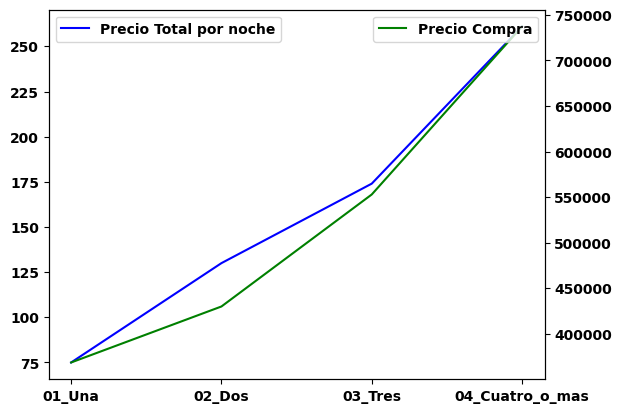

In [50]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc["bedrooms_disc"].precio_total, color="blue", label="Precio Total por noche")
ax2= ax.twinx()
ax2.plot(minicubo_precio.loc["bedrooms_disc"].precio_compra, color="green", label="Precio Compra")
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
;

- En cuanto al número de habitaciones no hay nada que destacar.

- Existe una relación lineal entre el precio de compra y el precio total que se puede cobrar.

- Parte de este efecto puede ser artificial, ya que hemos utilizado el número de habitaciones para calcular tanto el precio total como el precio de compra.

In [51]:
minicubo_precio.loc["beds_disc"]

,precio_total,precio_compra
value,,
1,80.0,368640.0
2,135.0,430080.0
3,150.0,430080.0
4-39,199.0,552960.0


''

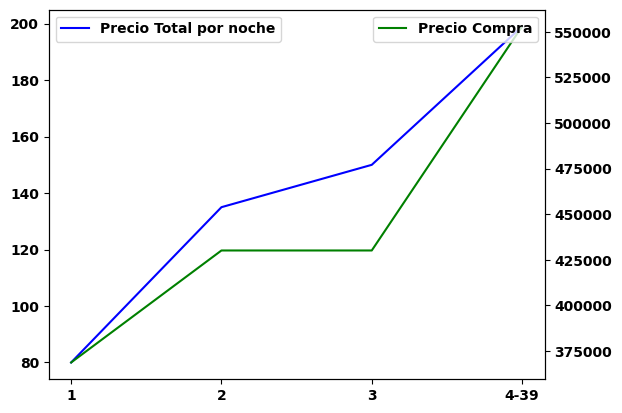

In [52]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc["beds_disc"].precio_total, color="blue", label="Precio Total por noche")
ax2= ax.twinx()
ax2.plot(minicubo_precio.loc["beds_disc"].precio_compra, color="green", label="Precio Compra")
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
;

- Se observa un crecimiento constante en el precio total por noche a medida que aumenta el número de camas, con una aceleración significativa después de alcanzar tres camas.

- El precio de compra de la vivienda muestra un crecimiento similar, sin diferencias entre 2 y 3 camas con un aumento más rápido a partir de 3 camas. 

- Por tanto el número óptimo de camas es o una cama o más de 3 camas. 

- Dado que no había este efecto en el número de habitaciones ¿podría ser que los propietarios estén intentando meter muchas más camas que habitaciones para maximizar el ingreso?

- Vamos a revisarlo con algunos ejemplos. 

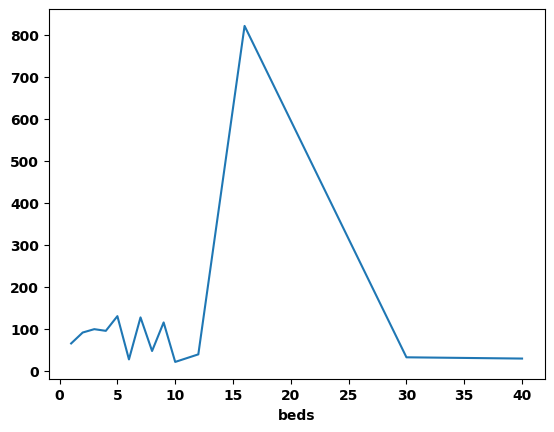

In [53]:
df_analisis[df_analisis.bedrooms == 1].groupby('beds').precio_total.median().plot();

Efectivamente aquí hay algo, ya que figura que para pisos de una habitación hay gente que está metiendo hasta decenas de camas!

Sería un tema a explorar con más detalle y comentar con alguien que conozca el negocio.

Vamos a ver unos ejemplos

In [54]:
df_analisis.loc[(df_analisis.bedrooms==1) & (df_analisis.beds>6)]

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,bedrooms,bathrooms,host_is_superhost,accommodates,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,ocupacion_disc,metros_2,precio_compra,distancia_a_sol
894,904,904,7110704,Rental unit in Madrid · ★4.0 · 1 bedroom · 7 b...,14573633,Latina,Lucero,40.400830,-3.748840,Entire home/apt,110.0,2,6,301,1.0,1.0,t,6,7.0,4,4.00,4.75,4.50,2699,110.0,17.5,01_Una,5-16,4-39,0-5,00_0%-52%,60,161940,4.239923
1747,1758,1758,15428073,Rental unit in Madrid · ★4.78 · 1 bedroom · 7 ...,32420211,Centro,Universidad,40.421257,-3.706301,Entire home/apt,284.0,1,4,224,1.0,1.0,t,6,7.0,99,4.78,4.89,4.97,6144,284.0,38.6,01_Una,5-16,4-39,30-297,00_0%-52%,60,368640,0.562764
2006,2017,2017,16763469,Bed and breakfast in Madrid · ★4.11 · 1 bedroo...,97914995,Centro,Palacio,40.416160,-3.712650,Shared room,22.0,1,5,351,1.0,3.5,f,8,8.0,84,4.11,4.51,4.76,6144,22.0,3.8,01_Una,5-16,4-39,30-297,00_0%-52%,60,368640,0.791029
6263,6296,6296,40871059,Hostel in Madrid · ★4.65 · 1 bedroom · 40 beds...,314662107,Centro,Embajadores,40.411090,-3.702660,Shared room,29.0,1,6,362,1.0,3.0,f,1,40.0,23,4.65,4.83,4.87,6144,29.0,0.8,01_Una,0-3,4-39,6-29,00_0%-52%,60,368640,0.629700
6501,6535,6535,42086734,Rental unit in Madrid · ★4.07 · 1 bedroom · 8 ...,319616632,Centro,Universidad,40.423050,-3.702880,Private room,175.0,1,22,358,1.0,4.0,f,9,8.0,14,4.07,4.79,4.86,6144,175.0,1.9,01_Una,5-16,4-39,6-29,00_0%-52%,60,368640,0.704267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19962,20030,20030,1013941581520210832,Rental unit in Madrid · ★4.25 · 1 bedroom · 12...,493916828,Centro,Universidad,40.421891,-3.703881,Shared room,39.0,1,45,361,1.0,2.5,f,2,12.0,4,4.25,4.75,5.00,6144,39.0,1.1,01_Una,0-3,4-39,0-5,00_0%-52%,60,368640,0.576086
19995,20063,20063,1012357173035634798,Rental unit in Madrid · ★4.25 · 1 bedroom · 10...,493916828,Centro,Universidad,40.421891,-3.703881,Shared room,21.0,1,45,360,1.0,2.5,f,1,10.0,4,4.25,4.75,5.00,6144,21.0,1.4,01_Una,0-3,4-39,0-5,00_0%-52%,60,368640,0.576086
20070,20138,20138,1015759084197790290,Rental unit in Madrid · ★4.0 · 1 bedroom · 12 ...,493916828,Centro,Universidad,40.421891,-3.703881,Shared room,62.0,1,45,362,1.0,2.5,f,3,12.0,3,4.00,4.00,5.00,6144,62.0,0.8,01_Una,0-3,4-39,0-5,00_0%-52%,60,368640,0.576086
20077,20145,20145,1015771752892144594,Rental unit in Madrid · ★New · 1 bedroom · 12 ...,493916828,Centro,Universidad,40.421891,-3.703881,Shared room,92.0,1,45,362,1.0,2.5,f,4,12.0,1,4.00,4.00,5.00,6144,92.0,0.8,01_Una,4,4-39,0-5,00_0%-52%,60,368640,0.576086


- Vemos que hay 77 viviendas en las que para inmuebles de 1 habitación se ponen más de 6 camas. 

**Revisamos los huespedes que se aceptan**

In [55]:
minicubo_precio.loc["accommodates_disc"]

,precio_total,precio_compra
value,,
0-3,69.0,368640.0
4,111.0,368640.0
5-16,160.0,430080.0


''

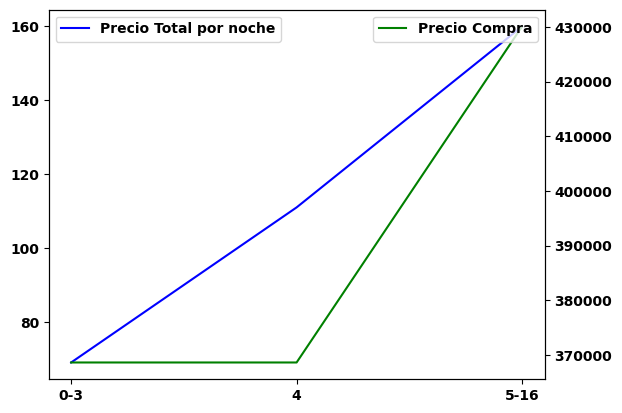

In [56]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc["accommodates_disc"].precio_total, color="blue", label="Precio Total por noche")
ax2= ax.twinx()
ax2.plot(minicubo_precio.loc["accommodates_disc"].precio_compra, color="green", label="Precio Compra")
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
;

**Insight 2: El Numero optimo de huespedes esta en 3 personas. No hay mucha diferencia con viviendas de 0 a 3 personas. A partir de 4 el piso necesita ser mayor y el precio de compra se incrementa bastante**

Guardamos el dataset en la base de datos

In [57]:
con = sa.create_engine("sqlite:///Datos2023/airbnb.db")
df_analisis.to_sql("df_analisis", con=con,if_exists="replace", index=False)

21319

### Analisis Geografico sobre un mapa

In [58]:
df_analisis.groupby("neighbourhood_group")["distancia_a_sol"].median().sort_values()

neighbourhood_group
Centro                    0.720465
Arganzuela                1.797363
Chamberí                  2.056675
Moncloa - Aravaca         2.110399
Retiro                    2.449518
Salamanca                 2.827033
Latina                    3.318384
Carabanchel               3.498564
Usera                     3.783360
Puente de Vallecas        4.274353
Chamartín                 4.524691
Tetuán                    4.663274
Moratalaz                 5.000908
Ciudad Lineal             5.142403
Villaverde                7.529505
Fuencarral - El Pardo     7.549266
Hortaleza                 7.945373
San Blas - Canillejas     8.081538
Vicálvaro                 8.691357
Villa de Vallecas         8.828834
Barajas                  11.573973
Name: distancia_a_sol, dtype: float64

In [59]:
distritos = df_analisis.groupby("neighbourhood_group")["distancia_a_sol"].median().sort_values()[0:7].index.to_list()

In [60]:
distritos

['Centro',
 'Arganzuela',
 'Chamberí',
 'Moncloa - Aravaca',
 'Retiro',
 'Salamanca',
 'Latina']

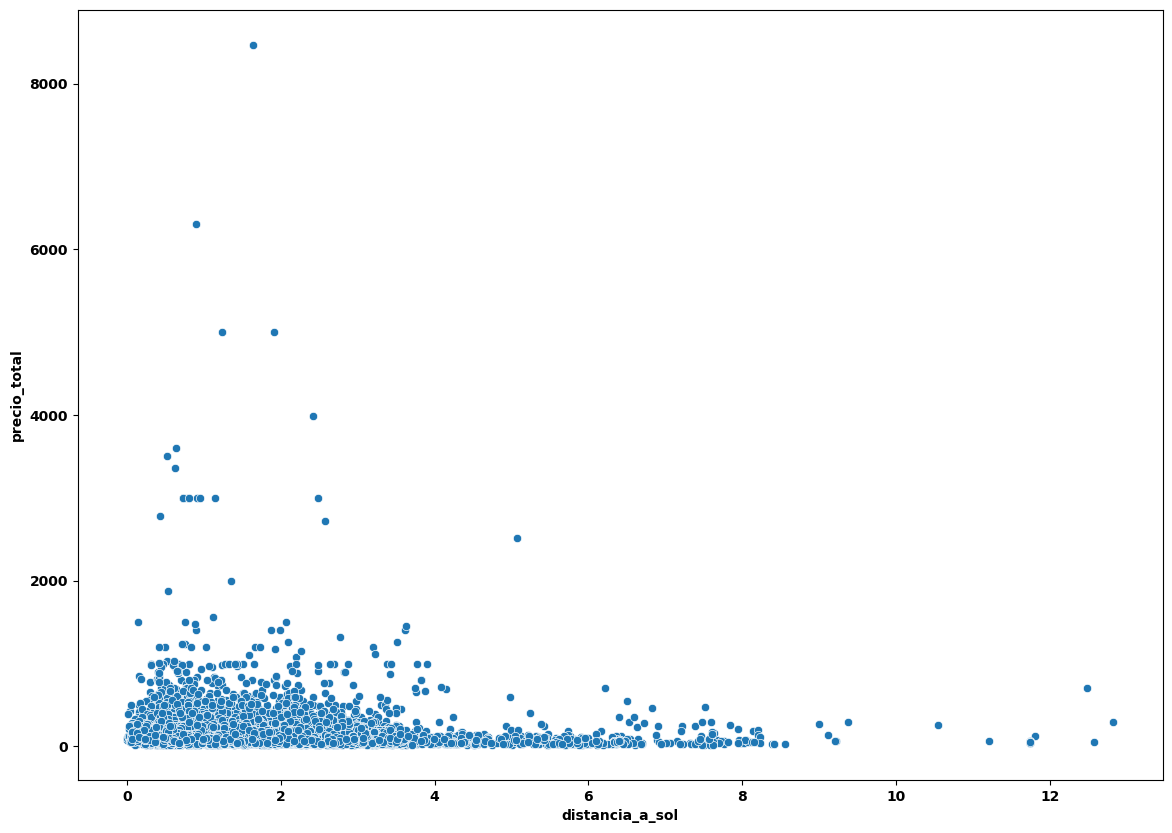

In [61]:
plt.figure(figsize=(14,10))
sns.scatterplot(data= df_analisis.loc[df_analisis.neighbourhood_group.isin(distritos)], x="distancia_a_sol", y="precio_total");

- Parece que no existe una relacion muy clara entre la distancia a la puerta del sol con el precio por noche que se puede pedir.
- Se podria ver que perfil de inmueble son los que piden por noche más de 2000 euros
- Previsiblemente tendrán menor precio de compra
- Parece que la cercanía a puntos de interés no tiene un especial impacto sobre el precio del alquiler

# Analisis Geográfico sobre un mapa 

In [63]:
import folium

In [65]:
# Vamos a usar las coordenadas de la Puerta del Sol:
lat1 = 40.4167278
lon1 = -3.7033387

In [66]:
folium.Map(location=[lat1, lon1], zoom_start=12)

Por ejemplo vamos a analizar visualmente el insight sobre el distrito de San Blas.

In [67]:
datos = df_analisis.loc[df_analisis.neighbourhood_group=="San Blas - Canillejas"].copy()

In [68]:
mapa = folium.Map(location=[lat1, lon1], zoom_start=12)

In [69]:
for flat in range(0, len(datos)):
    folium.Marker(
    location=[datos.iloc[flat]["latitude"],datos.iloc[flat]["longitude"]], 
    popup=datos.iloc[flat]["precio_total"]).add_to(mapa)
    
mapa

Esta representación está bien, pero tenemos que ir haciendo click en cada uno para ver el precio.

Sería más fácil si tuviéramos un código de colores que nos indicara visualmente el rango de precio.

Para ello vamos a crear una nueva variable discretizada y cambiaremos el marcador a un círculo de colores.

In [74]:
datos["precio_total_disc"] = pd.qcut(datos["precio_total"], q=[0, 0.25, 0.5, 0.75, 1], 
       labels=["blue", "purple", "orange","red"])

In [75]:
mapa = folium.Map(location=[lat1, lon1], zoom_start=12)

In [76]:
for flat in range(0, len(datos)):
    folium.CircleMarker(
    location=[datos.iloc[flat]["latitude"],datos.iloc[flat]["longitude"]], 
    popup=datos.iloc[flat]["precio_total"], 
    fill=True, 
    color =datos.iloc[flat]["precio_total_disc"], 
    fill_opacity=0.5, 
    radius=5).add_to(mapa)
    
mapa

**Existen todavía muchos puntos morados y azules, lo cual puede indicar que todavía existe potencial para explotar más el factor de los eventos deportivos**

**Mapa sobre los precios en el distrito de chamberí**

In [102]:
df_analisis.neighbourhood_group.unique()

array(['Chamartín', 'Centro', 'Latina', 'Arganzuela', 'Tetuán',
       'Salamanca', 'Retiro', 'Chamberí', 'Carabanchel',
       'San Blas - Canillejas', 'Ciudad Lineal', 'Hortaleza', 'Barajas',
       'Usera', 'Villaverde', 'Puente de Vallecas',
       'Fuencarral - El Pardo', 'Moncloa - Aravaca', 'Vicálvaro',
       'Moratalaz', 'Villa de Vallecas'], dtype=object)

In [103]:
datos = df_analisis.loc[df_analisis.neighbourhood_group=="Chamberí"].copy()

In [104]:
datos["precio_total_disc"] = pd.qcut(datos["precio_total"], q=[0, 0.25, 0.5, 0.75, 1], 
       labels=["blue", "purple", "orange","red"])

In [105]:
mapa = folium.Map(location=[lat1, lon1], zoom_start=12)

In [106]:
for flat in range(0, len(datos)):
    folium.CircleMarker(
    location=[datos.iloc[flat]["latitude"],datos.iloc[flat]["longitude"]], 
    popup=datos.iloc[flat]["precio_total"], 
    fill=True, 
    color =datos.iloc[flat]["precio_total_disc"], 
    fill_opacity=0.5, 
    radius=5).add_to(mapa)

mapa